In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [26]:
df = pd.read_csv("website_reviews.csv")

In [27]:
df.head()

,Entity,Date,Hour,Channel Type,Application,Sub-Channels,Unnamed: 6,Comments,Sentiment,Mobile,User
0,DP,28/07/2021,6:00 AM,Web,Dubai Police Portal,Dubai Police Portal,NaN,Easy helpful and fast,Happy,504312007,NaN
1,DP,27/07/2021,9:00 PM,Web,Dubai Police Portal,Dubai Police Portal,NaN,Human nature is tired when hearing a police si...,Happy,506352235,NaN
2,DP,27/07/2021,9:00 PM,Web,Dubai Police Portal,Dubai Police Portal,NaN,Good,Unhappy,556430933,NaN
3,DP,27/07/2021,6:00 PM,Web,Dubai Police Portal,Dubai Police Portal,NaN,"Slow system, law enforcement officers are high...",Unhappy,44549509,NaN
4,DP,25/07/2021,9:00 PM,Web,Dubai Police Portal,Dubai Police Portal,NaN,"activation code did not receive all the day, I...",Unhappy,563439473,NaN


In [28]:
df.drop(['Entity','Hour','Channel Type','Application','Sub-Channels','Unnamed: 6','Mobile','User'], axis=1, inplace=True)

In [35]:
df.head()

,Date,Comments,Sentiment
0,28/07/2021,Easy helpful and fast,Happy
1,27/07/2021,Human nature is tired when hearing a police si...,Happy
2,27/07/2021,Good,Unhappy
3,27/07/2021,"Slow system, law enforcement officers are high...",Unhappy
4,25/07/2021,"activation code did not receive all the day, I...",Unhappy


In [32]:
df.count()

Date         808
Comments     802
Sentiment    808
dtype: int64

In [33]:
df.groupby('Sentiment').count()

,Date,Comments
Sentiment,,
Happy,479,475
Neutral,55,54
Unhappy,274,273


In [36]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Sentiment'>

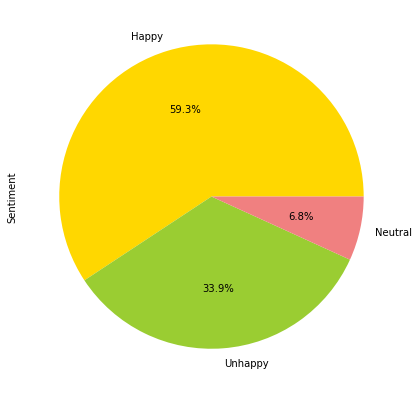

In [38]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
labels = 'Happy', 'Unhappy', 'Neutral'
df['Sentiment'].value_counts().plot.pie(figsize=(10, 7), colors=colors, labels=labels, autopct='%1.1f%%')

In [39]:
df.drop(['Date','Sentiment'], axis=1, inplace=True)

In [40]:
df.head()

,Comments
0,Easy helpful and fast
1,Human nature is tired when hearing a police si...
2,Good
3,"Slow system, law enforcement officers are high..."
4,"activation code did not receive all the day, I..."


In [54]:
df.dropna(inplace = True) 

In [56]:
df.to_csv(r'CleanWebsiteReviews2021.csv')

# Sentiment Analysis

In [57]:
len(df['Comments'])

802

In [59]:
df['word_count'] = df['Comments'].apply(lambda x: len(x.split()))
df['char_count'] = df['Comments'].apply(lambda x: len(x))

In [60]:
df.head()

,Comments,word_count,char_count
0,Easy helpful and fast,4,21
1,Human nature is tired when hearing a police si...,24,137
2,Good,1,4
3,"Slow system, law enforcement officers are high...",83,487
4,"activation code did not receive all the day, I...",17,95


In [61]:
def average_words(x):
    words = x.split()
    return sum(len(word) for word in words) /len(words)

In [62]:
df['average_words_length'] = df['Comments'].apply(lambda x: average_words(x))

In [63]:
df.head()

,Comments,word_count,char_count,average_words_length
0,Easy helpful and fast,4,21,4.500000
1,Human nature is tired when hearing a police si...,24,137,4.708333
2,Good,1,4,4.000000
3,"Slow system, law enforcement officers are high...",83,487,4.879518
4,"activation code did not receive all the day, I...",17,95,4.647059


In [64]:
#Filtering Stop Words
from nltk.corpus import stopwords

In [65]:
stop_words = stopwords.words('english')

In [66]:
len(stop_words)

179

In [67]:
df['stopword_count'] = df['Comments'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

In [68]:
df['stopword_rate'] = df['stopword_count'] / df['word_count']

In [69]:
df.head()

,Comments,word_count,char_count,average_words_length,stopword_count,stopword_rate
0,Easy helpful and fast,4,21,4.500000,1,0.250000
1,Human nature is tired when hearing a police si...,24,137,4.708333,8,0.333333
2,Good,1,4,4.000000,0,0.000000
3,"Slow system, law enforcement officers are high...",83,487,4.879518,39,0.469880
4,"activation code did not receive all the day, I...",17,95,4.647059,8,0.470588


In [73]:
df['lowercase'] = df['Comments'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [74]:
df.head()

,Comments,word_count,char_count,average_words_length,stopword_count,stopword_rate,lowercase
0,Easy helpful and fast,4,21,4.500000,1,0.250000,easy helpful and fast
1,Human nature is tired when hearing a police si...,24,137,4.708333,8,0.333333,human nature is tired when hearing a police si...
2,Good,1,4,4.000000,0,0.000000,good
3,"Slow system, law enforcement officers are high...",83,487,4.879518,39,0.469880,"slow system, law enforcement officers are high..."
4,"activation code did not receive all the day, I...",17,95,4.647059,8,0.470588,"activation code did not receive all the day, i..."


In [75]:
df['puntuaction'] = df['lowercase'].str.replace('[^\w\s]','')

/Users/pablo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [76]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [77]:
df ['stopwords'] = df ['puntuaction'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [78]:
df.head()

,Comments,word_count,char_count,average_words_length,stopword_count,stopword_rate,lowercase,puntuaction,stopwords
0,Easy helpful and fast,4,21,4.500000,1,0.250000,easy helpful and fast,easy helpful and fast,easy helpful fast
1,Human nature is tired when hearing a police si...,24,137,4.708333,8,0.333333,human nature is tired when hearing a police si...,human nature is tired when hearing a police si...,human nature tired hearing police site proud v...
2,Good,1,4,4.000000,0,0.000000,good,good,good
3,"Slow system, law enforcement officers are high...",83,487,4.879518,39,0.469880,"slow system, law enforcement officers are high...",slow system law enforcement officers are highl...,slow system law enforcement officers highly po...
4,"activation code did not receive all the day, I...",17,95,4.647059,8,0.470588,"activation code did not receive all the day, i...",activation code did not receive all the day i ...,activation code receive day complete report re...


In [79]:
pd.Series(" ".join(df['stopwords']).split()).value_counts()[:30]

police         135
dubai          111
good           103
service         81
number          55
report          55
thanks          55
fine            52
thank           51
easy            49
help            41
please          40
need            31
app             30
excellent       30
accident        29
traffic         29
one             29
use             29
car             28
get             27
certificate     27
uae             26
station         25
application     24
work            24
great           23
call            23
want            22
pay             22
dtype: int64

In [80]:
other_stop_words = ['service', "police", "card", 'dubai']

In [81]:
df['cleanreviews'] = df['stopwords'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words))

In [82]:
df.head()

,Comments,word_count,char_count,average_words_length,stopword_count,stopword_rate,lowercase,puntuaction,stopwords,cleanreviews
0,Easy helpful and fast,4,21,4.500000,1,0.250000,easy helpful and fast,easy helpful and fast,easy helpful fast,easy helpful fast
1,Human nature is tired when hearing a police si...,24,137,4.708333,8,0.333333,human nature is tired when hearing a police si...,human nature is tired when hearing a police si...,human nature tired hearing police site proud v...,human nature tired hearing site proud visit we...
2,Good,1,4,4.000000,0,0.000000,good,good,good,good
3,"Slow system, law enforcement officers are high...",83,487,4.879518,39,0.469880,"slow system, law enforcement officers are high...",slow system law enforcement officers are highl...,slow system law enforcement officers highly po...,slow system law enforcement officers highly po...
4,"activation code did not receive all the day, I...",17,95,4.647059,8,0.470588,"activation code did not receive all the day, i...",activation code did not receive all the day i ...,activation code receive day complete report re...,activation code receive day complete report re...


## Lemmatization

In [83]:
from textblob import Word

In [84]:
df['lemmatized'] = df['cleanreviews'].apply(lambda x: " ".join (Word(word).lemmatize() for word in x.split()))

In [85]:
df.head()

,Comments,word_count,char_count,average_words_length,stopword_count,stopword_rate,lowercase,puntuaction,stopwords,cleanreviews,lemmatized
0,Easy helpful and fast,4,21,4.500000,1,0.250000,easy helpful and fast,easy helpful and fast,easy helpful fast,easy helpful fast,easy helpful fast
1,Human nature is tired when hearing a police si...,24,137,4.708333,8,0.333333,human nature is tired when hearing a police si...,human nature is tired when hearing a police si...,human nature tired hearing police site proud v...,human nature tired hearing site proud visit we...,human nature tired hearing site proud visit we...
2,Good,1,4,4.000000,0,0.000000,good,good,good,good,good
3,"Slow system, law enforcement officers are high...",83,487,4.879518,39,0.469880,"slow system, law enforcement officers are high...",slow system law enforcement officers are highl...,slow system law enforcement officers highly po...,slow system law enforcement officers highly po...,slow system law enforcement officer highly poo...
4,"activation code did not receive all the day, I...",17,95,4.647059,8,0.470588,"activation code did not receive all the day, i...",activation code did not receive all the day i ...,activation code receive day complete report re...,activation code receive day complete report re...,activation code receive day complete report re...


## Analysis

In [86]:
from textblob import TextBlob

In [87]:
df['polarity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])

In [88]:
df['subjectivity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])

In [89]:
df.drop(['lowercase','puntuaction','stopwords','cleanreviews','lemmatized'], axis=1, inplace=True)

In [91]:
df.sort_values(by='polarity')

,Comments,word_count,char_count,average_words_length,stopword_count,stopword_rate,polarity,subjectivity
662,Very difficult to use\nIt didn t help and gave...,15,78,4.200000,8,0.533333,-0.75,1.000000
707,Very bad,2,8,3.500000,1,0.500000,-0.70,0.666667
450,Bad service they just pass your concern yo oth...,33,171,4.212121,17,0.515152,-0.70,0.666667
176,Bad follow up,3,13,3.666667,1,0.333333,-0.70,0.666667
174,Very bad experience,3,19,5.666667,1,0.333333,-0.70,0.666667
...,...,...,...,...,...,...,...,...
82,excellent app.,2,14,6.500000,0,0.000000,1.00,1.000000
75,Always the best in efficient service,6,36,5.166667,2,0.333333,1.00,0.300000
282,Excellent service,2,17,8.000000,0,0.000000,1.00,1.000000
256,Dubai Police is the Best Police In the World \...,13,68,4.153846,5,0.384615,1.00,0.300000


In [92]:
df.describe()

,word_count,char_count,average_words_length,stopword_count,stopword_rate,polarity,subjectivity
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,12.688279,67.729426,5.314247,5.790524,0.342135,0.246166,0.380873
std,17.910377,96.213313,18.039917,8.969000,0.229299,0.351159,0.340356
min,1.000000,1.000000,1.000000,0.000000,0.000000,-0.750000,0.000000
25%,2.000000,13.000000,4.000000,1.000000,0.029620,0.000000,0.000000
50%,6.000000,34.000000,4.360390,3.000000,0.400000,0.156667,0.400000
75%,15.000000,82.000000,5.142857,7.750000,0.500000,0.500000,0.600000
max,161.000000,880.000000,514.000000,83.000000,1.000000,1.000000,1.000000
